f = 2 * ω * sin(φ)

where:

    f is the Coriolis parameter (in rad/s²),
    ω is the Earth’s angular velocity (approximately 7.2921159 × 10⁻⁵ rad/s),
    φ is the latitude in radians (convert degrees to radians by multiplying by π/180),
    sin() is the sine function.
    
    
[`metpy.calc.geostrophic_wind()`](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.geostrophic_wind.html)


In [15]:
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import calculations as cc
import postprocessing as pp
import eurec4a

def load_control(timestep=0, keyword='3D'):
    data = eurec4a.get_intake_catalog().simulations.ICON.LES_CampaignDomain_control[f'{keyword}_DOM01'].to_dask()
    # data = data.where(data.time < data_to_match.time.values[-1], drop=True)
    try:    del(data['height_bnds'])
    except: pass
    data = data.isel(time=timestep)
    data = pp.add_grid(data)
    data = pp.cut_borders(data)
    data = cc.replace_level_with_height(data)
    return data

ctrl = load_control(187)
ctrl

<xarray.Dataset>
Dimensions:    (cell: 2154774, height: 68)
Coordinates:
    lat        (cell) float64 dask.array<chunksize=(69085,), meta=np.ndarray>
    lon        (cell) float64 dask.array<chunksize=(69085,), meta=np.ndarray>
  * height     (height) float64 5.602e+03 5.481e+03 5.362e+03 ... 34.78 10.0
    time       datetime64[ns] 2020-02-01T21:00:00
Dimensions without coordinates: cell
Data variables:
    cloud_num  (cell) float32 dask.array<chunksize=(69085,), meta=np.ndarray>
    pres       (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    qc         (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    qr         (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    qv         (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    rho        (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    temp       (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    theta_v    (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    u          (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    v          (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
    w          (height, cell) float32 dask.array<chunksize=(4, 69085), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

In [20]:
import os
import subprocess
import xarray as xr

infile  = '/scratch/m/m300872/temp/example_ifile.nc'
outfile = '/scratch/m/m300872/temp/example_ofile.nc'
for f in [infile, outfile]: 
    try: os.remove(f)
    except: pass
ctrl.to_netcdf(infile)
command = ['cdo', 'remapcon,r72000x36000 ', infile, outfile]
subprocess.call(command)
xr.open_dataset(outfile)

Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_vertices
Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_vertices
Warning (cdfInqContents): Coordinates variable time can't be assigned!

cdo    remapcon (Abort): Source grid cell corner coordinates missing!


<xarray.Dataset>
Dimensions:  (lon: 72000, lat: 36000, height: 68)
Coordinates:
  * lon      (lon) float64 0.0 0.005 0.01 0.015 0.02 ... 360.0 360.0 360.0 360.0
  * lat      (lat) float64 -90.0 -89.99 -89.99 -89.98 ... 89.98 89.99 89.99 90.0
  * height   (height) float64 5.602e+03 5.481e+03 5.362e+03 ... 66.93 34.78 10.0
Data variables:
    *empty*
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6

In [12]:
from geopy import distance

distance.distance((lat1, lon1), (lat2, lon2)).km

In [19]:
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import calculations as cc
import metpy

# isobar = cc.get_z_full()* metpy.units.units('m')
# isobar = np.linspace(100000, 100000, (100, 100))
isobar = np.ones((10,10)) * 0 * metpy.units.units('m')

# metpy.calc.geostrophic_wind(height, dx=None, dy=None, latitude=None, x_dim=-1, y_dim=-2, *, parallel_scale=None, meridional_scale=None, longitude=None, crs=None)
metpy.calc.geostrophic_wind(isobar, dx=600 * metpy.units.units('m'), dy=600 * metpy.units.units('m'), latitude=12 * metpy.units.units('degree'))

(array([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.]]) <Unit('meter / second')>,
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

In [4]:
import metpy.calc
import numpy as np

isobar = np.ones((10,10)) * 0 * metpy.units.units('m')
isobar = np.ones((10,10)) * np.arange(0,10,1) * metpy.units.units('m')
# metpy.calc.geostrophic_wind(height, dx=None, dy=None, latitude=None, x_dim=-1, y_dim=-2, *, parallel_scale=None, meridional_scale=None, longitude=None, crs=None)
metpy.calc.geostrophic_wind(isobar, dx=600 * metpy.units.units('m'), dy=600 * metpy.units.units('m'), latitude=12 * metpy.units.units('degree'))

(array([[-0.00000000e+00, -3.50645713e-14, -7.01291426e-14,
         -1.40258285e-13, -1.40258285e-13,  2.80516571e-13,
         -2.80516571e-13,  2.80516571e-13, -2.80516571e-13,
         -8.41549712e-13],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.000000

In [1]:
import numpy as np
import metpy.constants

def coriolis(lat):
    angular_velocity = 7.2921159 * 10**(-5) # Earth’s angular velocity [rad/s]
    return 2 * angular_velocity * np.sin(lat)

print(coriolis(np.deg2rad(15)) / (2*np.pi) * metpy.constants.earth_avg_radius)

38.274376402077344 meter


#### TODO
- [ ] wind field
- [ ] pressure field 
- [ ] plus gradient


In [1]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import eurec4a
import numpy as np
import xarray as xr
import calculations as cc
import postprocessing as pp
import datetime
import pandas as pd

import matplotlib.pyplot as plt
import plot_utils as pu

def add_total_wind(data):
    data['u+v_10m'] = np.sqrt(data['u_10m']**2 + data['v_10m']**2)
    attributes = data['u_10m'].attrs.copy()
    attributes['standard_name'] = 'u+v_10m'
    attributes['long_name'] = 'total wind'
    del(attributes['param'])
    data['u+v_10m'] = data['u+v_10m'].assign_attrs(attributes)
    return data

def calculate_quantiles(data, quantiles=[0.05, 0.50, 0.95]):
    ''' to provide the mean in the quantile dimension it is assigned to the value -0.5'''
    quantiles = [data.chunk(dict(cell=-1)).quantile(q, dim='cell', keep_attrs=True).assign_coords({'quantile':q}) for q in quantiles]
    quantiles.append(data.mean(dim='cell', keep_attrs=True).assign_coords({'quantile':-.5}))
    return xr.concat(quantiles, 'quantile')

def save_composit_timeseries(path, savename):
    def load_and_clean(path, keyword):
        files = [os.path.join(path,f) for f in os.listdir(path) if keyword in f]
        data = pp.open_mfdataset_with_timedoubles(files)
        data = pp.clean_surface_data(data)
        data = pp.add_grid(data)
        data = pp.cut_borders(data)
        return data
    
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]
    data = load_and_clean(path, 'surface')
    data = add_total_wind(data)
    surface = calculate_quantiles(data, quantiles=quantiles)
    data = load_and_clean(path, 'radiation')
    radiation = calculate_quantiles(data)
    xr.merge(pp.time_overlap([surface,radiation])).to_netcdf(savename)

def save_matching_eurecadata(data_to_match, savename):
    def load_and_clean(keyword):
        data = eurec4a.get_intake_catalog().simulations.ICON.LES_CampaignDomain_control[f'{keyword}_DOM01'].to_dask()
        data = data.where(data.time < data_to_match.time.values[-1], drop=True)
        data = pp.add_grid(data)
        data = pp.cut_borders(data)
        return data
    
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]
    data = load_and_clean('surface')
    data = add_total_wind(data)
    surface = calculate_quantiles(data, quantiles=quantiles)
    data = load_and_clean('radiation')
    radiation = calculate_quantiles(data, quantiles=quantiles)
    composit = xr.merge(pp.time_overlap([surface,radiation]))
    try:    del(composit['height_bnds'])
    except: pass
    composit.to_netcdf(savename)

def fig_all_domain_means(data, labels, kwargs=False, verbose=False, integral=False, mean=False):
    if not kwargs: kwargs = [dict() for d in data]
    m, n = cc.isqrt(len(list(data[0])))
    if verbose: print(len(list(data[0])) * len(list(data)), ' plots: ', end='')
    fig,axs = plt.subplots(m,n, figsize=(30,15))

    for ax, var in zip(np.ravel(axs), list(data[0])):
        for j, d in enumerate(data):
            x = [pd.to_datetime(t) for t in d['time'].values]
            x = [(t - d['time'].values[0]) /np.timedelta64(1,'h')  for t in d['time'].values]
            y = d[var].sel(quantile=-0.5).values
            
            if mean: ax.axhline(np.mean(y), **kwargs[j], ls=':')
            try:
                y_lo = d[var].sel(quantile=0.25).values
                y_hi = d[var].sel(quantile=0.75).values
                ax.fill_between(x, y_lo, y_hi, **kwargs[j], alpha=0.1)
            except: pass
            ax.plot(x, y, label=labels[j], **kwargs[j])
            pu.remove_spines(ax)
        ax.set_title(data[0][var].attrs['long_name'])
        ax.set_ylabel(data[0][var].attrs['units'])
    if verbose: print('done')
    return fig, axs


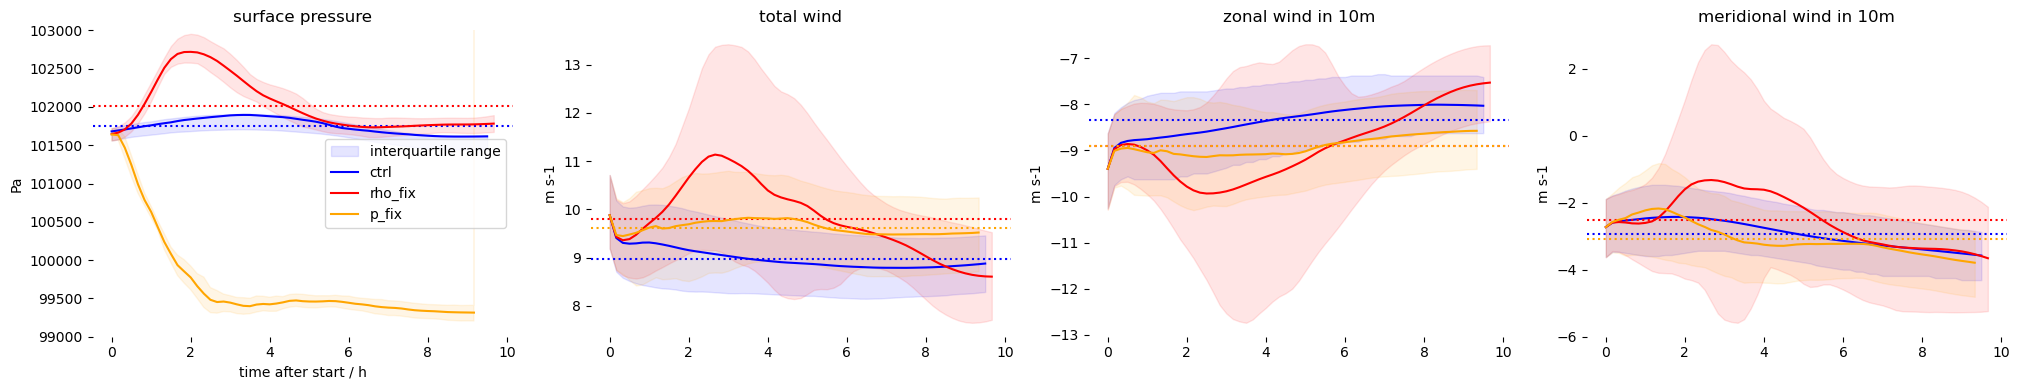

In [12]:
def fig_few_domain_means(data, varlist, labels, kwargs=False, verbose=False, integral=False, mean=False):
    if not kwargs: kwargs = [dict() for d in data]
    if verbose: print(len(list(data[0])) * len(list(data)), ' plots: ', end='')
    fig,axs = plt.subplots(1,len(varlist), figsize=(20,20/(len(varlist)+1)))

    for ax, var in zip(np.ravel(axs), varlist):
        for j, d in enumerate(data):
            x = [pd.to_datetime(t) for t in d['time'].values]
            x = [(t - d['time'].values[0]) /np.timedelta64(1,'h')  for t in d['time'].values]
            y = d[var].sel(quantile=-0.5).values
            
            if mean: ax.axhline(np.mean(y), **kwargs[j], ls=':')
            try:
                y_lo = d[var].sel(quantile=0.25).values
                y_hi = d[var].sel(quantile=0.75).values
                if j == 0: label = 'interquartile range'
                else: label=None
                ax.fill_between(x, y_lo, y_hi, **kwargs[j], alpha=0.1, label=label)
            except: pass
            ax.plot(x, y, label=labels[j], **kwargs[j])
            pu.remove_spines(ax)
        ax.set_title(data[0][var].attrs['long_name'])
        ax.set_ylabel(data[0][var].attrs['units'])
    axs[0].set_xlabel('time after start / h')
    if verbose: print('done')
    return fig, axs

def fixedfig_few_domain_means_warming_withboundaryzone(varlist, mean=False):
    warming_timeseries = f'data/rhofix_moistadabatic_{str(datetime.date.today())}.nc'
    control_timeseries = f'data/eurecasurface_{str(datetime.date.today())}.nc'
    pressure_drop_timeseries = f'data/pfix_moistadabatic_{str(datetime.date.today())}.nc'
    
    if not os.path.exists(warming_timeseries): 
        save_composit_timeseries('/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_spinup', warming_timeseries)
        print('warming done')
    if not os.path.exists(control_timeseries):
        warm = xr.open_dataset(warming_timeseries)
        save_matching_eurecadata(warm, control_timeseries)
        print('control done')
    if not os.path.exists(pressure_drop_timeseries): 
        save_composit_timeseries('/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic', pressure_drop_timeseries)
        print('pre done')
    
    ctrl = xr.open_dataset(control_timeseries)
    try:    del(ctrl['height_bnds'])
    except: pass
    rho_fix = xr.open_dataset(warming_timeseries)
    p_fix = xr.open_dataset(pressure_drop_timeseries)
    data = {'ctrl':ctrl, 'rho_fix':rho_fix, 'p_fix':p_fix}
    labels = list(data.keys())
    data = list(data.values())
    kwargs = [{'color' : 'blue'}, {'color' : 'red'}, {'color' : 'orange'}]
    
    fig, axs = fig_few_domain_means(data, varlist, labels, kwargs, mean=mean, verbose=False)
    np.ravel(axs)[0].legend()
    fig.tight_layout()
    return fig, axs, data

varlist = ['pres_sfc', 'u+v_10m', 'u_10m', 'v_10m']
fig, axs, data = fixedfig_few_domain_means_warming_withboundaryzone(mean=True, varlist=varlist)
np.ravel(axs)[0].set_ylim(99000,103000) # there is one strange outlier that compresses the rest of the plot to a line
fig.show()

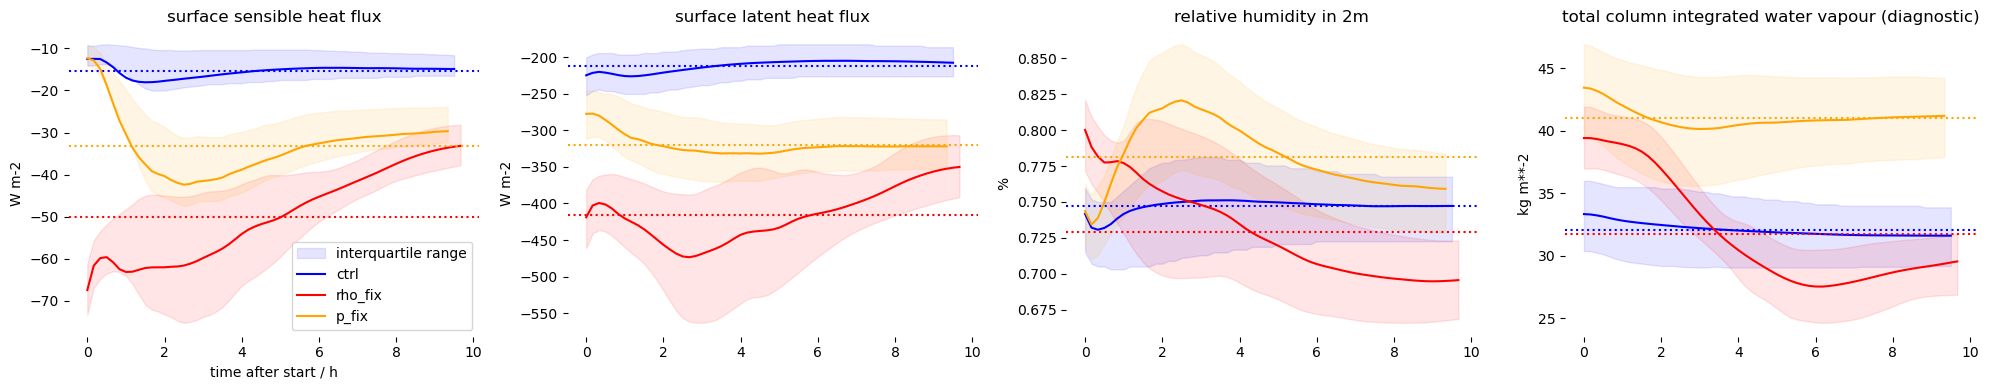

In [13]:
varlist = ['shfl_s', 'lhfl_s', 'rh_2m', 'tqv_dia']
fig, axs, data = fixedfig_few_domain_means_warming_withboundaryzone(mean=True, varlist=varlist)
fig.show()

In [5]:
control_timeseries = f'data/eurecasurface_{str(datetime.date.today())}.nc'
xr.open_dataset(control_timeseries)

<xarray.Dataset>
Dimensions:        (quantile: 6, time: 53, height: 68)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-09T10:00:00 ... 2020-01-09T1...
  * quantile       (quantile) float64 0.05 0.25 0.5 0.75 0.95 -0.5
  * height         (height) float64 83.0 84.0 85.0 86.0 ... 148.0 149.0 150.0
Data variables: (12/20)
    clct           (quantile, time) float64 ...
    lhfl_s         (quantile, time) float64 ...
    pres_sfc       (quantile, time) float64 ...
    qv_2m          (quantile, time) float64 ...
    rain_gsp_rate  (quantile, time) float64 ...
    rh_2m          (quantile, time) float64 ...
    ...             ...
    v_10m          (quantile, time) float64 ...
    u+v_10m        (quantile, time) float64 ...
    sob_t          (quantile, time) float64 ...
    sod_t          (quantile, time) float64 ...
    sou_t          (quantile, time) float64 ...
    thb_t          (quantile, time) float64 ...
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

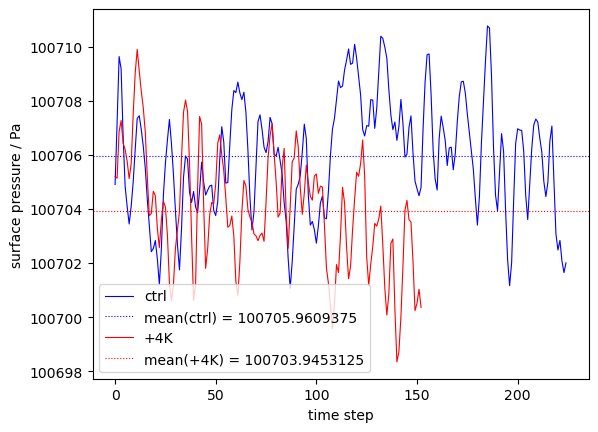

In [6]:
import os
import xarray as xr
import matplotlib.pyplot as plt

RESOLUTION = '03'

def get_aqua(path=f'/work/mh0287/m300901/experiments/aquaplanet_{RESOLUTION}/someinfo', output_type='2d'):
    files = [os.path.join(path, f) for f in os.listdir(path) if f'dayavg_atm_{output_type}_ml' in f]
    data = xr.open_mfdataset(files).rename({'ncells':'cell'})
    if output_type == '2d': data = data.isel(height=0, drop=True).isel(height_2=0, drop=True)
    return data

def get_aqua4k(path=f'/work/mh0287/m300901/experiments_4k/aquaplanet_{RESOLUTION}/', output_type='2d'):
    files = [os.path.join(path, f) for f in os.listdir(path) if f'{output_type}_dayavg_ml' in f]
    data = xr.open_mfdataset(files)
    files = [os.path.join(path, f) for f in os.listdir(path) if 'grid' in f]
    grid = xr.open_dataset(files[0])
    data = xr.merge([data.rename({'ncells':'cell'}), grid]).drop_vars(list(grid)).drop_dims(['vertex', 'edge'])
    if output_type == '2d': data = data.isel(height=0, drop=True).isel(height_2=0, drop=True)
    return data

def fig_aquaplanet_timeseries(var):
    fig, ax = plt.subplots()
    ctrl, warm = get_aqua(), get_aqua4k()
    for d, label, kwargs in zip([ctrl, warm], ['ctrl', '+4K'], [{'color':'blue'}, {'color':'red'}]):
        x = range(len(d.time.values))
        y = d[var].mean(dim=['cell'])
        ax.plot(x, y, label=label, lw=.8, **kwargs)
        mean = y.mean(dim=['time'])
        ax.axhline(mean, label=f'mean({label}) = {mean.values}', lw=.8, **kwargs, ls=':')

    ax.set_ylabel(f'{ctrl[var].long_name} / {ctrl[var].units}')
    ax.set_xlabel('time step')
    ax.legend()
    return fig, ax

fig, ax = fig_aquaplanet_timeseries('ps')
fig.show()

In [7]:
import os
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import numpy as np
import file_handling as fh
import postprocessing as pp

def get_latbc(path='/work/mh1126/m300872/unchanged/latbc/', time_slice=slice(0,100)):
    files = fh.get_filelist(lost='', conserved=path)[time_slice]
    latbc = xr.open_mfdataset(files)
    latbc = latbc.drop(['clon_bnds', 'clat_bnds', 'height_bnds', 'height_3_bnds', 'z_ifc', 'height', 'w', 'height_2'])
    latbc = latbc.rename({'clon':'lon', 'clat':'lat', 'ncells':'cell', 'height_3':'height'})
    return latbc.isel(time=time_slice)


latbc = get_latbc()
latbc = latbc.isel(height=74)['pres']

boxes = dict() # min_lat, max_lat, min_lon, max_lon
boxes['west']  = pp.rectangle([(9,15),(-65,-58)]) 
boxes['east']  = pp.rectangle([(9,15),(-46,-44)])
boxes['north'] = pp.rectangle([(16.5,17.0),(-57.5,-47.5)]) 
boxes['south'] = pp.rectangle([( 7.0, 8.5),(-57.5,-47.5)])

lat_grad = pp.cut_rectangle(latbc, boxes['north']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['south']).mean(dim='cell')
lon_grad = pp.cut_rectangle(latbc, boxes['west']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['east']).mean(dim='cell')

# lon_grad = west.mean(dim='cell') - east.mean(dim='cell')
# # print('west-east   : ', lon_grad.values,  ' Pa')
# lat_grad = north.mean(dim='cell') - south.mean(dim='cell')
# # print('north-south : ', lat_grad.values,  ' Pa')

angle  = np.rad2deg(np.arctan(lon_grad / lat_grad))

for a,lon,lat in zip(angle.values, lon_grad.values, lat_grad.values): 
    print(str(a).rjust(12),str(lon).rjust(12),str(lat).rjust(12))

# print('west-east  : ', west[var].mean(dim='cell').values  - east[var].mean(dim='cell').values,  ' Pa')
# print('north-south: ', north[var].mean(dim='cell').values - south[var].mean(dim='cell').values, ' Pa')

  -12.399161   -113.46094    516.08594
   -10.58659    -93.96094    502.72656
   -8.253946    -71.91406     495.7422
  -4.0054536   -35.070312    500.84375
  -3.5646443   -32.078125     514.9375
   -6.465544   -56.882812     501.9375
   -8.708993    -74.72656    487.82812
   -9.472724   -79.171875        474.5
   -9.116485    -76.53125    476.92188
   -10.37509       -87.25     476.5547
  -6.4082007   -53.054688     472.3828
   1.0559281     8.734375     473.8828
    8.639838       72.125    474.67188
   12.198492    102.39844    473.67188
     17.5665    146.60156    463.08594
   20.191639    166.98438     454.0547
   17.594166    146.21094    461.07812
   10.015407     86.21875    488.20312
   4.8113384    44.320312     526.5469
 -0.35228935   -3.3515625    545.08594
  -3.7293873   -36.773438    564.16406
   -5.971731      -62.125    593.89844
   -7.856747    -83.38281     604.2578
  -5.9551086   -61.382812     588.4531
  -3.7935863        -37.5     565.5469
  -1.8273603   -17.726562

NaN values:  0


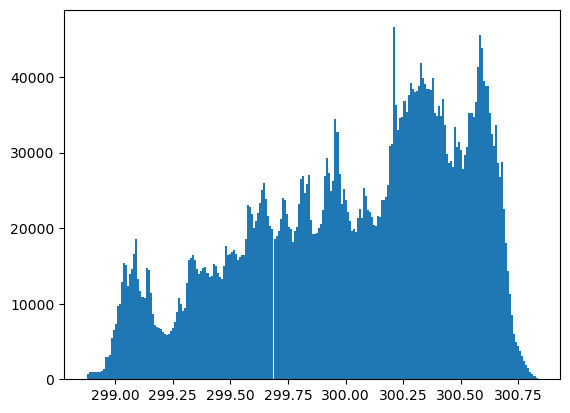

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def numberOfNonNans(data): 
    # https://stackoverflow.com/a/21778195
    return np.count_nonzero(~np.isnan(data))

sst = xr.open_dataset('/work/mh1126/m300872/unchanged/sst_sic/data/sst_sic_DOM01.nc').isel(time=0)['SST']
print('NaN values: ', len(sst.values) - numberOfNonNans(sst.values))
plt.hist(sst, bins='auto')
plt.show()

In [9]:
len(fh.get_filelist(lost='', conserved='/work/mh1126/m300872/unchanged/latbc/'))

1026

In [10]:
west[var].isel(height=74).mean(dim='cell').values  - east[var].isel(height=74).mean(dim='cell').values

NameError: name 'west' is not defined

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import datashader
from datashader.mpl_ext import dsshow

import cartopy.crs as ccrs
import cartopy.feature as cf


data = xr.open_zarr("https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/EUREC4A_LES/experiment_2/ICON_DOM01_surface.zarr")
grid = xr.open_zarr("https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/grids/EUREC4A_PR1250m_DOM01.zarr")

central_longitude = -52.514643611218816
central_latitude = 0.7427418858005285
central_latitude = 12
satellite_height = 52006430.62592313
satellite_height = 520064300000.62592313

vmin =  97599
vmax = 110000
vmin, vmax = 101100,101800
q = 0.05
vmin, vmax = np.nanquantile(variable, q), np.nanquantile(variable, 1.0-q)
var = "pres_sfc"
cmap = "viridis"
timestep = 1732

variable = data[var].isel(time=timestep)

projection = ccrs.NearsidePerspective(central_longitude=central_longitude, central_latitude=central_latitude, satellite_height=satellite_height)

coords = projection.transform_points(
    ccrs.Geodetic(),
    np.rad2deg(grid.clon),
    np.rad2deg(grid.clat),)

fig, axs = plt.subplots(1,2, subplot_kw={"projection": projection}, figsize=(20,10))
fig.canvas.draw_idle()
ax = axs[0]
ax.add_feature(cf.COASTLINE, linewidth=0.8)

artist = dsshow(pd.DataFrame({"val": variable.values, "x": coords[:, 0], "y": coords[:, 1],}),
                datashader.Point('x', 'y'), datashader.mean('val'),
                vmin=vmin, vmax=vmax, cmap=cmap, ax=ax)
# ax.set_xlim(101100,101900)
fig.colorbar(artist, label=f"{variable.long_name} / {variable.units}", ax=ax)

ax = axs[1]
ax.hist(variable, bins='auto')

In [ ]:
fig, ax = plt.subplots()
ax.hist(variable, bins='auto')
ax.set_xlim(101100,101900)

In [ ]:
q = 0.05
np.nanquantile(variable, q), np.nanquantile(variable, 1.0-q)

In [2]:
import os 
from scipy.interpolate import NearestNDInterpolator
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

def interpolate_field_lon_lat(field, lon_coord="lon", lat_coord="lat", relative_resolution=1.5):
    # courtesy of marius winkler
    nlon = nlat = int(np.sqrt(len(field) * relative_resolution))  # maybe make this more configurable
    
    lon_points = field[lon_coord].values
    lat_points = field[lat_coord].values
    
    lon = np.linspace(np.min(lon_points), np.max(lon_points), nlon)
    lat = np.linspace(np.min(lat_points), np.max(lat_points), nlat)
    lon2, lat2 = np.meshgrid(lon, lat)
    
    points = np.stack((lon_points, lat_points), axis=1)
    return xr.DataArray(
        NearestNDInterpolator(points, field.values)(lon2, lat2),
        dims=["lat", "lon"],
        coords={"lon": lon, "lat": lat})

def load_eurec4a_surface(domain='DOM01'):
    data = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/EUREC4A_LES/experiment_2/ICON_{domain}_surface.zarr")
    grid = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/grids/EUREC4A_PR1250m_{domain}.zarr")
    return xr.merge([data,grid]).drop_vars(list(grid)).drop_dims(['edge','vertex']).rename({'clon':'lon', 'clat':'lat'})

def ax_imshow_field(ax, data, q=0.05, vmin=None, vmax=None):
    if vmin == None: vmin = np.nanquantile(data, q)
    if vmax == None: vmax = np.nanquantile(data, 1.0-q)
    extent = [np.rad2deg(x) for x in [np.nanmin(data['lon'].values), np.nanmax(data['lon'].values), np.nanmin(data['lat'].values), np.nanmax(data['lat'].values)]]
    image = ax.imshow(interpolate_field_lon_lat(data), extent=extent, vmin=vmin, vmax=vmax)
    # ax.invert_yaxis()
    return ax

def ax_contour_field(ax, data, relative_resolution=0.0005):
    def fmt(x): return f"{x:.0f} hPa"
    z = interpolate_field_lon_lat(data, relative_resolution=relative_resolution)
    x = np.rad2deg(z['lon'].values)
    y = np.flip(np.rad2deg(z['lat'].values))
    levels = np.linspace(1000,1025,26)
    contour_plot = ax.contour(x,y,z, levels=levels, colors='black')
    ax.clabel(contour_plot, contour_plot.levels, fmt=fmt, inline=True, fontsize=10)
    return ax

def ax_quiver_winds(ax, data, relative_resolution=0.0001):
    u = interpolate_field_lon_lat(data['u'], relative_resolution=relative_resolution)
    v = interpolate_field_lon_lat(data['v'], relative_resolution=relative_resolution)
    x = np.rad2deg(u['lon'].values)
    y = np.rad2deg(u['lat'].values)
    y = np.flip(y)
    ax.quiver(x,y,u,v)
    return ax


def fig_quiver_plot_with_contour(data, vmin=None, vmax=None):
    var = "pres_sfc"
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title(f'{data[var].attrs["long_name"]} at {pd.to_datetime(data[var].time.values)}')
    ax.set_xlabel('Longitude / °E')
    ax.set_ylabel('Latitude / °N')

    ax = ax_imshow_field(ax, data[var] / 100, vmin=vmin, vmax=vmax)
    ax = ax_contour_field(ax, data[var] / 100)
    ax = ax_quiver_winds(ax, data.rename({'u_10m':'u', 'v_10m':'v'}))
    return fig, ax


# vmin = 990
# vmax = 1030
# vmin = 1010
# vmax = 1020

# data = load_eurec4a_surface()

# file_list = [f for f in os.listdir('/scratch/m/m300872/quiver') if f.startswith('ctrl_quiver')]
# file_list.sort()
# todo_time_list = data.time.values[len(file_list)::]

# print(len(file_list))
# print(len(todo_time_list))
# print(file_list[-1])
# print(todo_time_list[0])

# for t in todo_time_list:
#     fig, ax = fig_quiver_plot_with_contour(data.sel(time=t), vmin=vmin, vmax=vmax)
#     fig.savefig(f'/scratch/m/m300872/quiver/ctrl_quiver_{pd.to_datetime(t)}.png')


In [3]:
os.getcwd()

'/home/m/m300872/warm_eurec4a/03_adiabatic_warming'

In [4]:
import xarray as xr

def load_eurec4a_surface(domain='DOM01'):
    data = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/EUREC4A_LES/experiment_2/ICON_{domain}_surface.zarr")
    grid = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/grids/EUREC4A_PR1250m_{domain}.zarr")
    return xr.merge([data,grid]).drop_vars(list(grid)).drop_dims(['edge','vertex']).rename({'clon':'lon', 'clat':'lat'})


# print(load_eurec4a_surface()['pres_sfc'].max(skipna=True))
# print(load_eurec4a_surface()['pres_sfc'].min(skipna=True))

In [ ]:
p = load_eurec4a_surface()['pres_sfc'].values
print(p.shape)
# maximum = p.max(['time','cell'])
# maximum

In [ ]:
import matplotlib.pyplot as plt
plt.close()

In [ ]:
import os 
print(len(os.listdir('/scratch/m/m300872/quiver')))
print(len([f for f in os.listdir('/scratch/m/m300872/quiver') if f.startswith('ctrl_quiver')]))



In [ ]:
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import plot_utils as pu

glob = '/scratch/m/m300872/quiver/ctrl*'
outfile = '/scratch/m/m300872/quiver_0.mp4'
pu.image2mpeg(glob, outfile)

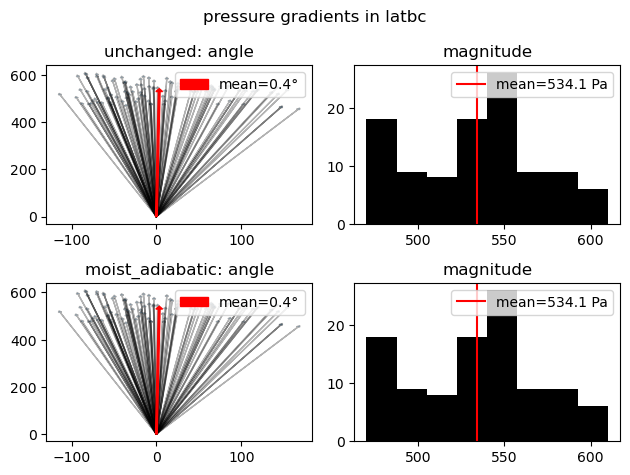

In [2]:
import os
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import numpy as np
import file_handling as fh
import postprocessing as pp
import importlib
importlib.reload(pp)

import matplotlib.pyplot as plt

def get_latbc(path='/work/mh1126/m300872/unchanged/latbc/', time_slice=slice(0,100)):
    files = fh.get_filelist(lost='', conserved=path)[time_slice]
    latbc = xr.open_mfdataset(files)
    latbc = latbc.drop(['clon_bnds', 'clat_bnds', 'height_bnds', 'height_3_bnds', 'z_ifc', 'height', 'w', 'height_2'])
    latbc = latbc.rename({'clon':'lon', 'clat':'lat', 'ncells':'cell', 'height_3':'height'})
    return latbc.isel(time=time_slice)


# latbc = get_latbc(path='/work/mh1126/m300872/unchanged/latbc/')
# latbc = latbc.isel(height=74)['pres']

# boxes = dict() # min_lat, max_lat, min_lon, max_lon
# boxes['west']  = pp.rectangle([(9,15),(-65,-58)]) 
# boxes['east']  = pp.rectangle([(9,15),(-46,-44)])
# boxes['north'] = pp.rectangle([(16.5,17.0),(-57.5,-47.5)]) 
# boxes['south'] = pp.rectangle([( 7.0, 8.5),(-57.5,-47.5)])

# lat_grad = pp.cut_rectangle(latbc, boxes['north']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['south']).mean(dim='cell')
# lon_grad = pp.cut_rectangle(latbc, boxes['west']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['east']).mean(dim='cell')
# angle  = np.rad2deg(np.arctan(lon_grad / lat_grad))
# # amplitude  = np.sqrt(lon_grad**2 + lat_grad**2)


time_slice = slice(0,103)
fig, axs = plt.subplots(2,2)
fig.suptitle('pressure gradients in latbc')

ax = axs[0,0]

latbc = get_latbc(path='/work/mh1126/m300872/unchanged/latbc/', time_slice=time_slice)
latbc = latbc.isel(height=74)['pres']

boxes = dict() # min_lat, max_lat, min_lon, max_lon
boxes['west']  = pp.rectangle([(9,15),(-65,-58)]) 
boxes['east']  = pp.rectangle([(9,15),(-46,-44)])
boxes['north'] = pp.rectangle([(16.5,17.0),(-57.5,-47.5)]) 
boxes['south'] = pp.rectangle([( 7.0, 8.5),(-57.5,-47.5)])

lat_grad = pp.cut_rectangle(latbc, boxes['north']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['south']).mean(dim='cell')
lon_grad = pp.cut_rectangle(latbc, boxes['west']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['east']).mean(dim='cell')
angle  = np.rad2deg(np.arctan(lon_grad / lat_grad))
amplitude  = np.sqrt(lon_grad**2 + lat_grad**2)

for t in lat_grad.time.values:
    ax.arrow(x=0, y=0, dx=lon_grad.sel(time=t).values, dy=lat_grad.sel(time=t).values, alpha=0.3, head_width=4) #, width=.08) 
ax.arrow(x=0, y=0, dx=lon_grad.mean(dim="time").values, dy=lat_grad.mean(dim="time").values, color='red', head_width=8, width=2, label=f'mean={angle.mean(dim="time").values:.1f}°') 
ax.set_title(f'unchanged: angle')
ax.legend()

ax = axs[0,1]
ax.hist(amplitude, bins='auto', color='black')
ax.axvline(amplitude.mean(dim='time'), color='red', label=f'mean={amplitude.mean(dim="time").values:.1f} Pa')
ax.legend()
ax.set_title(f'magnitude')


ax = axs[1,0]
latbc = get_latbc(path='/work/mh1126/m300872/moist_adiabatic/latbc/', time_slice=time_slice)
latbc = latbc.isel(height=74)['pres']

boxes = dict() # min_lat, max_lat, min_lon, max_lon
boxes['west']  = pp.rectangle([(9,15),(-65,-58)]) 
boxes['east']  = pp.rectangle([(9,15),(-46,-44)])
boxes['north'] = pp.rectangle([(16.5,17.0),(-57.5,-47.5)]) 
boxes['south'] = pp.rectangle([( 7.0, 8.5),(-57.5,-47.5)])

lat_grad = pp.cut_rectangle(latbc, boxes['north']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['south']).mean(dim='cell')
lon_grad = pp.cut_rectangle(latbc, boxes['west']).mean(dim='cell') - pp.cut_rectangle(latbc, boxes['east']).mean(dim='cell')
angle  = np.rad2deg(np.arctan(lon_grad / lat_grad))
amplitude  = np.sqrt(lon_grad**2 + lat_grad**2)

for t in lat_grad.time.values:
    ax.arrow(x=0, y=0, dx=lon_grad.sel(time=t).values, dy=lat_grad.sel(time=t).values, alpha=0.3, head_width=4) #, width=.08) 
ax.arrow(x=0, y=0, dx=lon_grad.mean(dim="time").values, dy=lat_grad.mean(dim="time").values, color='red', head_width=8, width=2, label=f'mean={angle.mean(dim="time").values:.1f}°') 
ax.set_title(f'moist_adiabatic: angle')
ax.legend()



ax = axs[1,1]
ax.hist(amplitude, bins='auto', color='black')
ax.axvline(amplitude.mean(dim='time'), color='red', label=f'mean={amplitude.mean(dim="time").values:.1f} Pa')
ax.legend()
ax.set_title(f'magnitude')

fig.tight_layout()
fig.show()
# def fig_quiver_plot_with_contour(data, vmin=None, vmax=None):
#     var = "pres_sfc"
#     fig, ax = plt.subplots(figsize=(15,8))
#     ax.set_title(f'{data[var].attrs["long_name"]} at {pd.to_datetime(data[var].time.values)}')
#     ax.set_xlabel('Longitude / °E')
#     ax.set_ylabel('Latitude / °N')

#     ax = ax_imshow_field(ax, data[var] / 100, vmin=vmin, vmax=vmax)
#     ax = ax_contour_field(ax, data[var] / 100)
#     ax = ax_quiver_winds(ax, data.rename({'u_10m':'u', 'v_10m':'v'}))
#     return fig, ax



# vmin = 990
# vmax = 1030
# vmin = 1010
# vmax = 1020

# data = load_eurec4a_surface()

# file_list = [f for f in os.listdir('/scratch/m/m300872/quiver') if f.startswith('ctrl_quiver')]
# file_list.sort()
# todo_time_list = data.time.values[len(file_list)::]

# print(len(file_list))
# print(len(todo_time_list))
# print(file_list[-1])
# print(todo_time_list[0])

# for t in todo_time_list:
#     fig, ax = fig_quiver_plot_with_contour(data.sel(time=t), vmin=vmin, vmax=vmax)
#     fig.savefig(f'/scratch/m/m300872/quiver/ctrl_quiver_{pd.to_datetime(t)}.png')




# lon_grad = west.mean(dim='cell') - east.mean(dim='cell')
# # print('west-east   : ', lon_grad.values,  ' Pa')
# lat_grad = north.mean(dim='cell') - south.mean(dim='cell')
# # print('north-south : ', lat_grad.values,  ' Pa')


# plt.arrow(x=4, y=18, dx=2, dy=5, width=.08) 
# for t in angle.time.values:
#     print(str(angle.sel(time=t).values).rjust(12),str(amplitude.sel(time=t).values).rjust(12),str(lon_grad.sel(time=t).values).rjust(12),str(lat_grad.sel(time=t).values).rjust(12))

# for a, amp, lon,lat in zip(angle.values, amplitude.values, lon_grad.values, lat_grad.values): 
    # print(str(a).rjust(12),str(lon).rjust(12),str(lat).rjust(12))

# print('west-east  : ', west[var].mean(dim='cell').values  - east[var].mean(dim='cell').values,  ' Pa')
# print('north-south: ', north[var].mean(dim='cell').values - south[var].mean(dim='cell').values, ' Pa')

In [ ]:
sorted(os.listdir())

In [ ]:
os.getcwd()

## Surface wind and pressure field

There is enough 2D data to make a little movie. 

- [control](https://owncloud.gwdg.de/index.php/s/1UlBTCM70kqQLfS)
- [fixed pressure](https://owncloud.gwdg.de/index.php/s/JNhpnBurfofL7LB)
- [fixed density](https://owncloud.gwdg.de/index.php/s/rYjEKHw1Iog74nV)

This is the batch script I use to create the frames:

In [ ]:
#! /sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/bin/python
#SBATCH --partition=compute
#SBATCH --account=bb1153
#SBATCH --nodes=1
#SBATCH --time=08:00:00
#SBATCH --mail-type=ALL
#SBATCH --mail-user=hernan.campos@mpimet.mpg.de
#SBATCH --output=%x.%j.log


import os
import sys
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import numpy as np
import xarray as xr
from scipy.interpolate import NearestNDInterpolator
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import postprocessing as pp

def interpolate_field_lon_lat(field, lon_coord="lon", lat_coord="lat", relative_resolution=1.5):
    # courtesy of marius winkler
    nlon = nlat = int(np.sqrt(len(field) * relative_resolution))  # maybe make this more configurable

    lon_points = field[lon_coord].values
    lat_points = field[lat_coord].values

    lon = np.linspace(np.min(lon_points), np.max(lon_points), nlon)
    lat = np.linspace(np.min(lat_points), np.max(lat_points), nlat)
    lon2, lat2 = np.meshgrid(lon, lat)

    points = np.stack((lon_points, lat_points), axis=1)
    return xr.DataArray(
        NearestNDInterpolator(points, field.values)(lon2, lat2),
        dims=["lat", "lon"],
        coords={"lon": lon, "lat": lat})

def load_control_surface(domain='DOM01'):
    data = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/EUREC4A_LES/experiment_2/ICON_{domain}_surface.zarr")
    grid = xr.open_zarr(f"https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/grids/EUREC4A_PR1250m_{domain}.zarr")
    return xr.merge([data,grid]).drop_vars(list(grid)).drop_dims(['edge','vertex']).rename({'clon':'lon', 'clat':'lat'})

def grid_path(domain='DOM01'):
    return f'/work/mh1126/m300872/unchanged/grids/EUREC4A_PR1250m_{domain}.nc'
def filelist(path, mask):
    return [os.path.join(path, f) for f in os.listdir(path) if mask in f]

def load_rhofix_surface(exp_dir='/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_spinup', domain='DOM01'):
    data = xr.open_mfdataset(filelist(exp_dir, 'DOM01_surface_'))
    data = data.rename({'ncells':'cell'})
    data = pp.replace_icon2datetime(data)
    grid = xr.open_dataset(grid_path())
    data = xr.merge([data,grid]).drop_vars(list(grid)).drop_dims(['edge','vertex']).rename({'clon':'lon', 'clat':'lat'})
    data = data.isel({'height':0, 'height_2':0}).drop(['height','height_2'])
    return data

def ax_imshow_field(ax, data, q=0.05, vmin=None, vmax=None):
    if vmin == None: vmin = np.nanquantile(data, q)
    if vmax == None: vmax = np.nanquantile(data, 1.0-q)
    extent = [np.rad2deg(x) for x in [np.nanmin(data['lon'].values), np.nanmax(data['lon'].values), np.nanmin(data['lat'].values), np.nanmax(data['lat'].values)]]
    image = ax.imshow(interpolate_field_lon_lat(data), extent=extent, vmin=vmin, vmax=vmax)
    ax.invert_yaxis()
    return ax

def ax_contour_field(ax, data, relative_resolution=0.0005, levels=np.linspace(1000,1025,26)):
    def fmt(x): return f"{x:.0f} hPa"
    z = interpolate_field_lon_lat(data, relative_resolution=relative_resolution)
    x = np.rad2deg(z['lon'].values)
    y = np.flip(np.rad2deg(z['lat'].values))
    contour_plot = ax.contour(x,y,z, levels=levels, colors='black')
    ax.clabel(contour_plot, contour_plot.levels, fmt=fmt, inline=True, fontsize=10)
    return ax

def ax_quiver_winds(ax, data, relative_resolution=0.0001):
    u = interpolate_field_lon_lat(data['u'], relative_resolution=relative_resolution)
    v = interpolate_field_lon_lat(data['v'], relative_resolution=relative_resolution)
    x = np.rad2deg(u['lon'].values)
    y = np.rad2deg(u['lat'].values)
    y = np.flip(y)
    ax.quiver(x,y,u,v)
    return ax

def fig_quiver_plot_with_contour(data, vmin=None, vmax=None):
    var = "pres_sfc"
    contour_levels = np.linspace(vmin,vmax,int(vmax-vmin)+1)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title(f'{data[var].attrs["long_name"]} at {pd.to_datetime(data[var].time.values)}')
    ax.set_xlabel('Longitude / °E')
    ax.set_ylabel('Latitude / °N')

    ax = ax_imshow_field(ax, data[var] / 100, vmin=vmin, vmax=vmax)
    ax = ax_contour_field(ax, data[var] / 100, levels=contour_levels)
    ax = ax_quiver_winds(ax, data.rename({'u_10m':'u', 'v_10m':'v'}))
    return fig, ax

def show_single_frame(data, t, vmin, vmax):
    '''for debugging/setting up'''
    fig, ax = fig_quiver_plot_with_contour(data.sel(time=t), vmin=vmin, vmax=vmax)
    fig.show()
    return fig, ax

def set_vars():
    global prefix
    global vmin, vmax, data
    if   prefix == 'ctrl':
        vmin = 1010
        vmax = 1020
        data = load_control_surface()
    elif prefix == 'rhofix':
        vmin = 1010
        vmax = 1030
        data = load_rhofix_surface()
    elif prefix == 'presfix':
        vmin = 990
        vmax = 1015
        data = load_rhofix_surface(exp_dir='/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic')

        
# prefix = 'ctrl'
# prefix = 'rhofix'
prefix = 'presfix'
set_vars()

file_list = [f for f in os.listdir('/scratch/m/m300872/quiver') if f.startswith(f'{prefix}_quiver')]
file_list.sort()
todo_time_list = data.time.values[len(file_list)::]

print(len(file_list), flush=True)
print(len(todo_time_list), flush=True)

try:
    print(file_list[-1], flush=True)
    print(todo_time_list[0], flush=True)
except: pass

# show_single_frame(data, todo_time_list[36], vmin, vmax)

for t in todo_time_list:
    target_filename = f'/scratch/m/m300872/quiver/{prefix}_quiver_{pd.to_datetime(t)}.png'
    print(target_filename, end='', flush=True)
    try:
        fig, ax = fig_quiver_plot_with_contour(data.sel(time=t), vmin=vmin, vmax=vmax)
        fig.savefig(target_filename)
        print(' DONE.', flush=True)
        plt.close(fig)
    except:
        print(' FAILED.', flush=True)
        plt.close()

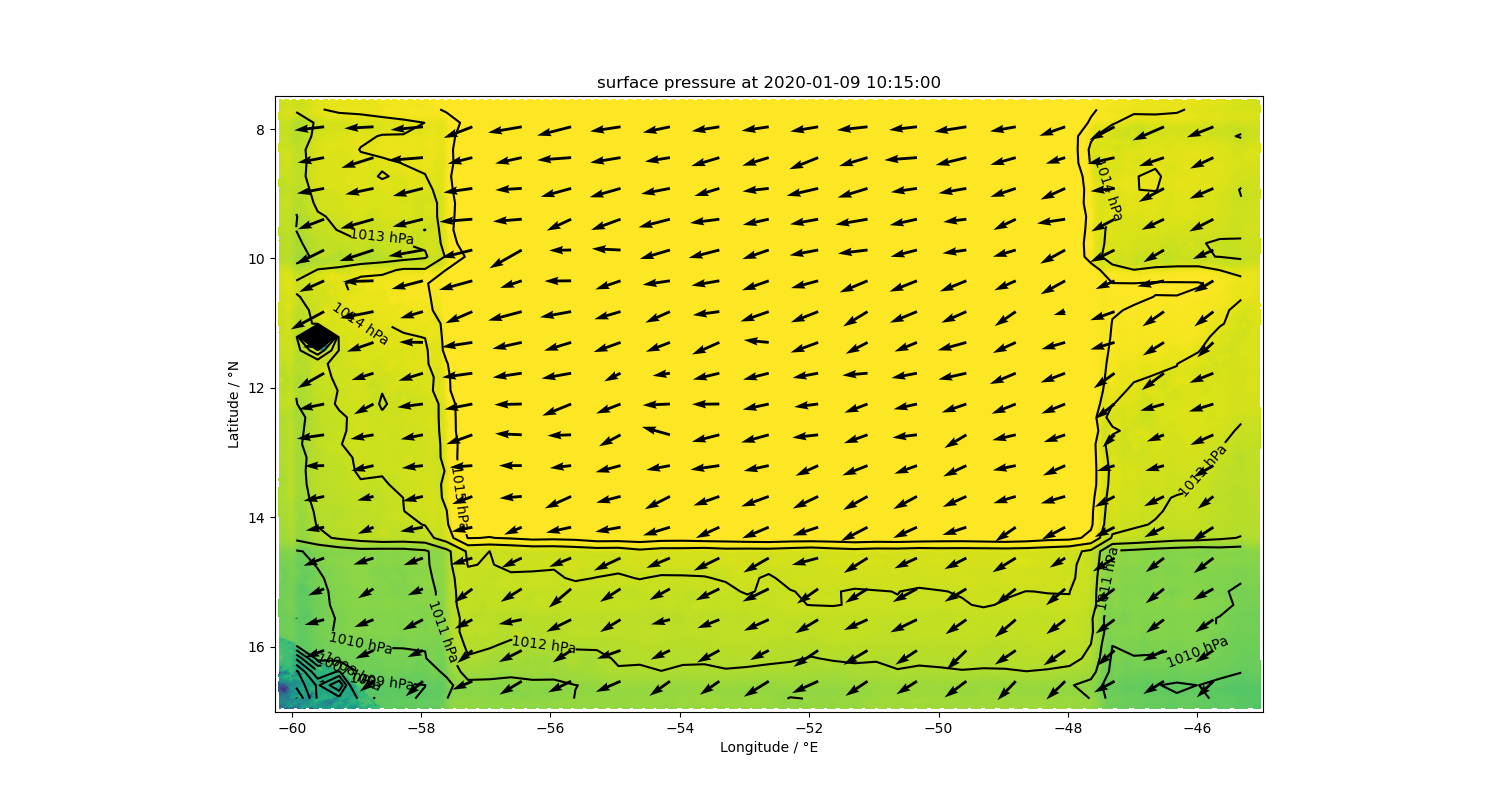

In [3]:
from IPython.display import Image, display

filename = '/scratch/m/m300872/quiver/presfix_quiver_2020-01-09 10:15:00.png'
display(Image(filename))

In [1]:
import imageio
import glob

def video_from_snapshots(files, save_path, fps=12, verbose=True):
    '''Concats frames from images in a file list and save video to path.'''
    writer = imageio.get_writer(save_path, fps=fps)
    for im in files: writer.append_data(imageio.imread(im))
    writer.close()
    if verbose: print(f'{save_path} DONE')

def make_video(prefix='ctrl', fps=6):
    # use 12 for longer videos
    folder = '/scratch/m/m300872/quiver/'
    files = sorted(glob.glob(folder+prefix+'*'))
    if len(files)>1000: files = files[0:1000]
    video_filename = f'/home/m/m300872/warm_eurec4a/03_adiabatic_warming/{prefix}_quiver.mp4'
    video_from_snapshots(files, video_filename, fps=6)
    return video_filename

prefixes = ['ctrl', 'presfix', 'rhofix']
make_video('presfix')

/tmp/ipykernel_892784/1811396030.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  for im in files: writer.append_data(imageio.imread(im))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 800) to (1504, 800) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


/home/m/m300872/warm_eurec4a/03_adiabatic_warming/presfix_quiver.mp4 DONE


'/home/m/m300872/warm_eurec4a/03_adiabatic_warming/presfix_quiver.mp4'